# Applied Machine Learning in Python Week 4

# Naive Bayes, Random Forests, Gradient Boosted Decision Trees and Neural Networks

## Veri Setleri

### Fruit DataSet

In [1]:
import pandas as pd 
fruits = pd.read_table("fruit_data_with_colors.txt")

#4 Özellikli fruits problemi (multiclass classificiation)
feature_names = ["height", "width", "mass", "color_score"]
X_fruits = fruits[feature_names]
y_fruits = fruits["fruit_label"]
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

#2 Özellikli fruits problemi (binary classsification)
X_fruits_2d = fruits[["height", "width"]]
y_fruits_2d = fruits['fruit_label']

### Dataset for Simple Regression Problem

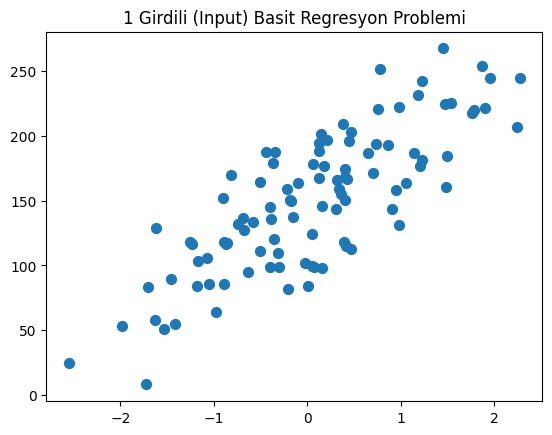

In [2]:
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1,
                            n_informative = 1, bias = 150.0,
                            noise = 30, random_state = 0)

import matplotlib.pyplot as plt
plt.scatter(X_R1, y_R1, marker = "o", s = 50)
plt.title("1 Girdili (Input) Basit Regresyon Problemi")
plt.show()

### Dataset for Complex Regression Problem

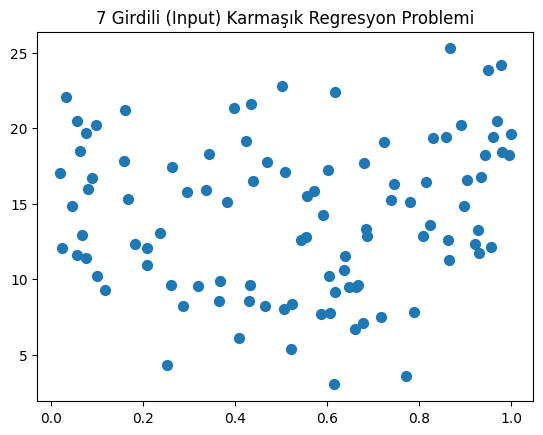

In [3]:
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state = 0)

import matplotlib.pyplot as plt
plt.scatter(X_F1[:,2], y_F1, marker = "o", s = 50)
plt.title("7 Girdili (Input) Karmaşık Regresyon Problemi")
plt.show()

### Dataset for Simple Binary Classification Problem

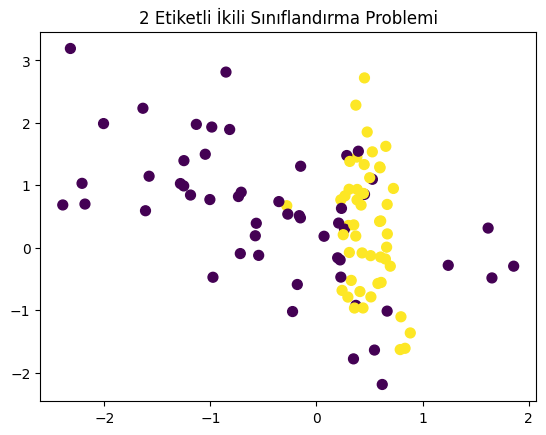

In [4]:
from sklearn.datasets import make_classification
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50)
plt.title("2 Etiketli İkili Sınıflandırma Problemi")
plt.show()

### Dataset for Complex Binary Classification Problem 

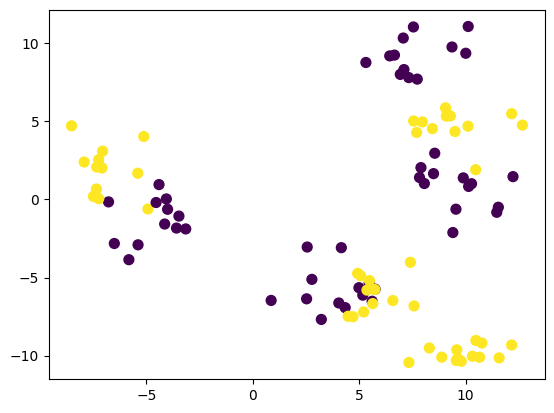

In [5]:
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2

plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

### Crime Dataset

In [6]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

(X_crime, y_crime) = load_crime_dataset()

In [7]:
X_crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66


In [8]:
y_crime.head()

0     41.02
1    127.56
2    218.59
3    306.64
5    442.95
Name: ViolentCrimesPerPop, dtype: float64

### Breast Cancer Dataset

In [9]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [10]:
X_cancer

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Naive Bayes Classifiers 

Naive Bayes Classifiers, belirli bir veri noktasının bir sınıfa ait olma olasılığını Bayes Teoremini esas alarak hesaplar ve bunu, sınıflandırma için kullanılan özelliklerin birbirinden bağımsız olduğunu varsayarak yapar. Bu yüzden de `Naive (Saf)` olarak adlandırılır. Bayes Formülü:

$P(C_k | x_1,x_2,...,x_n) = \frac{P(C_k) * P(x_1,x_2,...,x_n | C_k)}{P(x_1,x_2,...,x_n)}$ şeklindedir.

+ $k$: Sınıf sayısı
+ $n$: Gözlem sayısı
+ $P(C_k | x_1,x_2,...,x_n)$: Bir veri noktasının $C_k$ sınıfına ait olma olasılığı (Koşullu olasılık: $x_1,x_2,...,x_n$ için $C_k$'nın koşullu olasılığı)
+ $P(x_1,x_2,...,x_n | C_k)$: Veri noktasının $C_k$ sınıfına ait olduğunda özelliklerin ortak olasılığı 
+ $P(x_1,x_2,...,x_n)$: Veri noktasının genel olarak sahip olduğu özelliklerin olasılığı

Naive Bayes algoritması sınıflandırma yaparken $P(C_k | x_1,x_2,...,x_n)$'yi maksimize eden sınıfı seçer. Özellikle, özellikler arasındaki bağımsızlık varsayımı nedeniyle, bu olasılıklar kolayca tahmin edilebilir. İşte bu yüzden dolayı (her özelliği birbirinden bağımsız olarak varsaydığı için) her veri noktasının belirli bir sınıfa ait olma olasılığını hesaplarken sadece basit istatistiksel hesaplamalar kullanır ve bu yüzden hızlı bir algoritmadır. Ancak bu hızlılığın bir cezası, Naive Bayes sınıflandırıcılarının genelleme performansı, genellikle diğer sınıflandırma algoritmalarına nazaran daha düşük olmasıdır. Yine de buna rağmen yüksek boyutlu sınıflandırma problemlerinde SVM algoritmaları gibi performans gösterebilir.


Scikit-Learn'de 3 çeşit Naive Bayes sınıflandırıcısı mevcuttur. Bunlar: 

**`Bernoulli Naive Bayes:`**

+ Bernoulli Naive Bayes sınıflandırıcısı, özelliklerin varlığı (1) veya yokluğunu (0) temsil eden ikili özelliklere sahip veri setleriyle çalışmak için tasarlanmıştır. Belirli bir sınıfın özelliklerin varlığı veya yokluğuyla ilgili olasılıkları hesaplar ve sınıflandırma yaparken bu olasılıkları kullanır.

**`Multinomial Naive Bayes:`**

+ Multinomial Naive Bayes sınıflandırıcısı, özelliklerin çok sayıda olası değere sahip olduğu veri setleriyle çalışmak için tasarlanmıştır. Belirli bir sınıfın özelliklerin olası değerleri için olasılıkları hesaplar ve sınıflandırma yaparken bu olasılıkları kullanır.


**`Gaussian Naive Bayes:`**

+ Gaussian Naive Bayes sınıflandırıcısı, özelliklerin sürekli veya gerçek değerler aldığı veri setleriyle çalışmak için tasarlanmıştır. Veri noktasının sınıfını tahmin etmek için, her bir sınıfa ait Gauss dağılımı kullanılarak olasılıklar hesaplanır ve en yüksek olasılığa sahip sınıf seçilir.
+ Özellikle, sayısal verilerle çalışırken sıklıkla kullanılır.+ 
Özelliklerin dağılımı, her bir sınıfa ait özelliklerin bir Gauss dağılımı olduğunu varsayar (Yani **Normal Dağılım**).

### Simple Binary Classification problemi için oluşturulan veri setinde Gaussian Naive Bayes modelinin uygulanması

In [12]:
#Veri setinin incelenmesi 
print(X_C2[:10])
print("\n", y_C2[:10])

[[ 0.37163989 -0.92276158]
 [-0.1617182   0.51386743]
 [-1.63650855  2.23389996]
 [ 0.62041909 -2.18941375]
 [-0.98718544  1.93299453]
 [-0.14918509  1.30535614]
 [ 1.61878776  0.31495229]
 [-2.0077599   1.98857017]
 [ 0.51055071 -0.12656384]
 [ 0.41002859 -0.70119016]]

 [0 0 0 0 0 0 0 0 1 1]


In [13]:
#Train ve Test setlerin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

#Gaussian Naive Bayes modelinin oluşturulması ve eğitilmesi
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)

#Modelin Train ve Test setlerindeki skoru
print(f"Train setindeki skor: {nbclf.score(X_train, y_train)}")
print(f"Test setindeki skor: {nbclf.score(X_test, y_test)}")

Train setindeki skor: 0.84
Test setindeki skor: 0.84


Modelin grafiği:

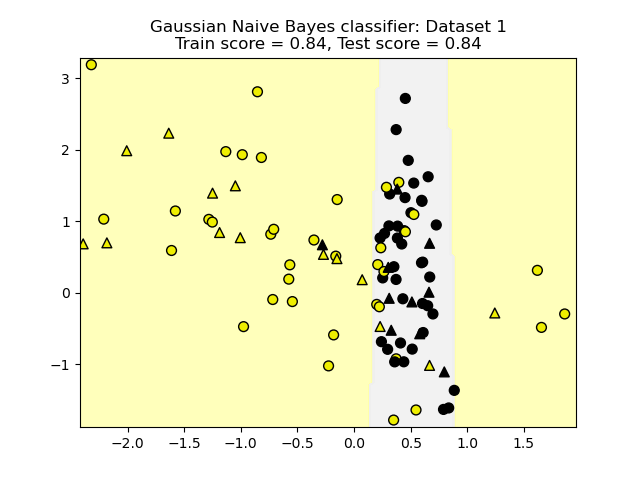

#### Model Evaluation

In [14]:
#DummyClassifier ile veri setinde dengesizlik olup olmadığına bakalım 

#DummyClassifier modelinin oluşturulması ve eğitilmesi
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)

#DummyClassifier modelinin Test setindeki doğruluğu
print(f"Test setindeki skor: {dummy.score(X_test, y_test)}")

Test setindeki skor: 0.4


+ Test setindeki skor 0.4 gibi düşük bir değer olduğundan dolayı veri setinde dengesizlik olmadığı kanısına varabiliriz.

In [15]:
#Gaussian Naive Bayes modeli için Confusion Matrix oluşturalım 

#Gaussian Naive Bayes modelinin ne kadar doğru sınıflandırma yaptığını görebilmek için Confusion Matrix oluşturulması
from sklearn.metrics import confusion_matrix
nbclf_predict = nbclf.predict(X_test) #Modelin X_test girdilerini kullanarak y_test çıktılarına dair tahminleri
confusion = confusion_matrix(y_test, nbclf_predict)

print(f"Gaussian Naive Bayes modelinin karmaşıklık matrisi: \n{confusion}")

Gaussian Naive Bayes modelinin karmaşıklık matrisi: 
[[12  3]
 [ 1  9]]


In [16]:
#Sınıflandırma problemleri için metriklerin Gaussian Naive Bayes Modelimiz için sonuçlarına bakalım 

#Metriklerin hesaplanması 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
nbclf_predict = nbclf.predict(X_test) #Modelin X_test girdilerini kullanarak y_test çıktılarına dair tahminleri
nbclf_accuracy = accuracy_score(y_test, nbclf_predict)
nbclf_precision = precision_score(y_test, nbclf_predict)
nbclf_recall = recall_score(y_test, nbclf_predict)
nbclf_f1 = f1_score(y_test, nbclf_predict)
nbclf_roc_auc = roc_auc_score(y_test, nbclf_predict)

print(f"Gaussian Naive Bayes modelinin Accuracy (Doğruluk) skoru: {nbclf_accuracy}")
print(f"Gaussian Naive Bayes modelinin Precision (Hassasiyet) skoru: {nbclf_precision}")
print(f"Gaussian Naive Bayes modelinin Recall (Duyarlılık) skoru: {nbclf_recall}")
print(f"Gaussian Naive Bayes modelinin F1 skoru: {nbclf_f1}")
print(f"Gaussian Naive Bayes modelinin ROC-AUC skoru: {nbclf_roc_auc}")

Gaussian Naive Bayes modelinin Accuracy (Doğruluk) skoru: 0.84
Gaussian Naive Bayes modelinin Precision (Hassasiyet) skoru: 0.75
Gaussian Naive Bayes modelinin Recall (Duyarlılık) skoru: 0.9
Gaussian Naive Bayes modelinin F1 skoru: 0.8181818181818182
Gaussian Naive Bayes modelinin ROC-AUC skoru: 0.85


+ Sonuçlara bakılarak, modelin genel performansının iyi olduğu kanısına varabiliriz

### Complex Binary Classification problemi için oluşturulan veri setinde Gaussian Naive Bayes modelinin uygulanması

In [17]:
#Veri setinin incelenmesi
print(X_D2[:10])
print("\n", y_D2[:10])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]
 [ 6.65725625  9.23712522]
 [-5.40812491  1.67549782]
 [ 6.5809958  -6.47473501]
 [12.67324661  4.75436629]
 [-7.49065357  0.19162724]]

 [1 0 0 0 0 0 1 1 1 1]


In [18]:
#Train ve Test setlerin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#Gaussian Naive Bayes modelinin oluşturulması ve eğitilmesi
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)

#Modelin Train ve Test setlerindeki skoru
print(f"Train setindeki skor: {nbclf.score(X_train, y_train)}")
print(f"Test setindeki skor: {nbclf.score(X_test, y_test)}")

Train setindeki skor: 0.6266666666666667
Test setindeki skor: 0.72


Modelin Grafiği:

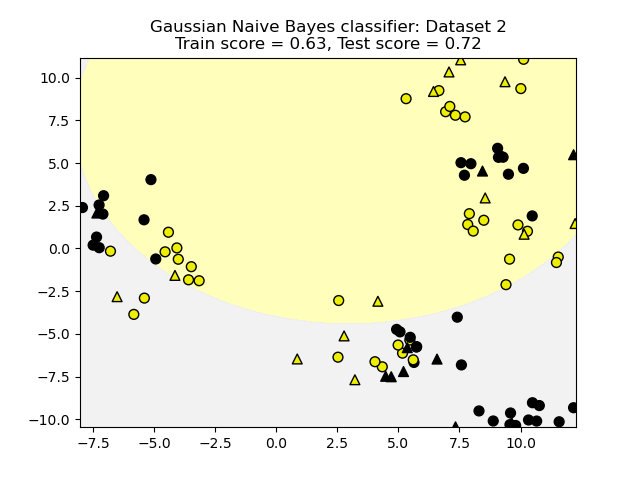

### Breast Cancer veri seti üzernde Gaussian Naive Bayes modelinin uygulanması

In [19]:
#Veri setinin incelenmesi
print(X_cancer[:3])
print("\n", y_cancer[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]

 [0 0 0]


In [20]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

#Modelin oluşturulması ve eğitilmesi
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)

print(f"Train setindeki skor: {nbclf.score(X_train, y_train)}")
print(f"Test setindeki skor: {nbclf.score(X_test, y_test)}")

Train setindeki skor: 0.9507042253521126
Test setindeki skor: 0.9370629370629371


## Random Forests 

Random Forests (Rastgele Ağaçlar) algoritması, birçok Karar Ağacının (Decision Trees) bir araya gelerek oluşturduğu bir topluluk modelidir. Bu algoritma,  rastgelelik ilkesine dayanır. Her bir karar ağacı, rastgele bir alt örneklem (bootstrap) alınmış veri seti üzerinde eğitilir. Ayrıca, her bir bölünme noktasında, bir alt küme özellikler rastgele seçilir. Bu, her bir karar ağacının birbirinden farklı olmasını sağlar. Tüm karar ağaçları eğitildikten sonra, sınıflandırma problemi için her bir ağaçtan gelen tahminlerin veya regresyon problemleri için her bir ağaçtan gelen tahminlerin ortalaması alınır (sınıflandırma için modu alınabilir). Bu, tüm karar ağaçlarının ortak kararını verir. 

Random Forests algoritması, her bir karar ağacının tek başına aşırı uyum (overfitting) eğilimini azaltır. Rastgele alt örneklem alma ve rastgele özellik seçimi, her bir karar ağacının farklı bir alt kümesi üzerinde eğitilmesini sağlar, bu da genelleme performansını artırır. Genellikle iyi performans gösteren ve hızlı çalışan bir algoritmadır. Büyük veri setlerinde ve yüksek boyutlu özellik uzaylarında bile etkili bir şekilde çalışabilir.

Random Forests: 

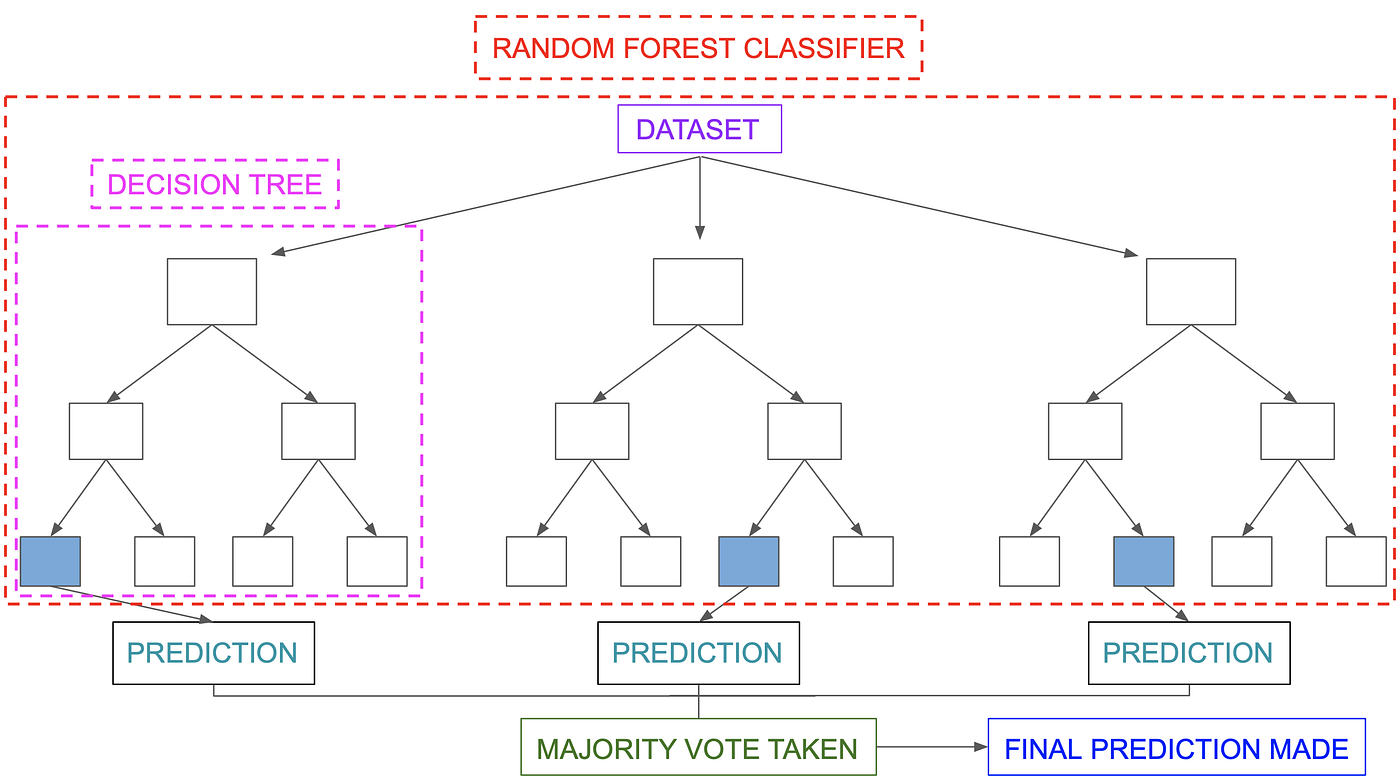

### Complex Binary Classification problemi için oluşturulan veri seti üzerinde Random Forests modelinin uygulanması 

In [21]:
#Veri setinin incelenmesi 
print(X_D2[:5])
print("\n", y_D2[:5])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]

 [1 0 0 0 0]


In [22]:
#Train ve Test setlerin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#Random Forests modelinin oluşturulması ve eğitilmesi
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)

#Modeli Train ve Test setlerindeki skoru 
print(f"Train setindeki skor {clf.score(X_train, y_train)}")
print(f"Test setindeki skor {clf.score(X_test, y_test)}")

Train setindeki skor 1.0
Test setindeki skor 0.76


Modelin grafiği:

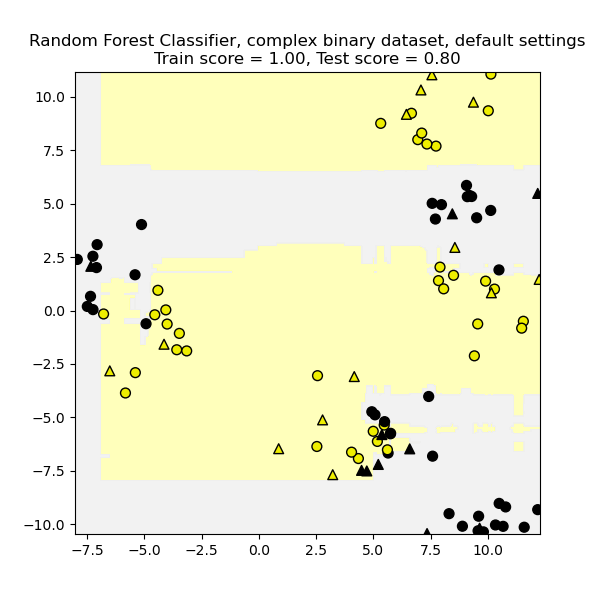

### `max_features` parametresine göre Random Forests modelinin Fruits veri setine uygulanması 

`max_features` parametresi, en iyi bölünmeyi ararken göz önünde bulundurulması gereken özelliklerin sayısını belirleyen parametredir. `default = sqrt`'dir. 

In [23]:
#Veri setinin incelenmesi
print(X_fruits.head(3))
print("\n", y_fruits.head(3))

   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60

 0    1
1    1
2    1
Name: fruit_label, dtype: int64


In [24]:
len(X_fruits.columns)

4

In [25]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state = 0)

In [26]:
#Random Forests modelinin max_features parametresine göre uygulanması 
from sklearn.ensemble import RandomForestClassifier
for i in range(1, len(X_fruits.columns)+1):
    clf = RandomForestClassifier(max_features = i).fit(X_train, y_train)
    train = clf.score(X_train, y_train)
    test = clf.score(X_test, y_test)
    print(f"max_features = {i} iken Train setindeki skor: {train} | Test setindeki skor: {test}")

max_features = 1 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.9333333333333333
max_features = 2 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8
max_features = 3 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8666666666666667
max_features = 4 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8666666666666667


### `n_estimators` parametresine göre Random Forests modelinin Fruits veri setine uygulanması

`n_estimators` parametresi, modeldeki ağaç sayısını belirleyen parametredir. `default = 100`'dur. Büyük veri setlerinde modeldeki ağaç sayısını arttırmak, overfittingi azaltır ancak modelin hesaplama maliyetini arttırır.

In [27]:
#Veri setinin incelenmesi
print(X_fruits.head(3))
print("\n", y_fruits.head(3))

#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state = 0)

   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60

 0    1
1    1
2    1
Name: fruit_label, dtype: int64


In [28]:
#Random Forests modelinin n_estimator parametresine göre uygulanması 
from sklearn.ensemble import RandomForestClassifier
for i in [50, 100, 200, 400]:
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    train = clf.score(X_train, y_train)
    test = clf.score(X_test, y_test)
    print(f"n_estimators = {i} iken Train setindeki skor: {train} | Test setindeki skor: {test}")

n_estimators = 50 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8666666666666667
n_estimators = 100 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8
n_estimators = 200 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8666666666666667
n_estimators = 400 iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8666666666666667


## Gradient Boosted Decision Trees

Gradient Boosted Decision Trees, birden çok zayıf Karar Ağaçlarının bir araya gelerek ve birbirlerinin hatalarını gidererek güçlü bir model oluşturduğu makine öğrenmesi modelidir. Bu modelin temel mantığı: 

**`Decision Trees:`**
+  GBDT, temel olarak karar ağaçlarını kullanır. Karar ağaçları, veri setindeki özelliklere ve hedef değişkene göre karar düğümlerinde bölümlenir. Her bir yaprak düğümü, bir sınıf etiketi (sınıflandırma için) veya bir sayısal tahmin (regresyon için) sağlar.

**`Boosting:`**
+ GBDT, boosting adı verilen bir ensamble tekniği kullanır. Boosting, zayıf öğrenicilerin performansını artırmak için birbirini takip eden bir dizi model oluşturur.
+ İlk olarak, veri seti üzerinde bir karar ağacı eğitilir ve hata fonksiyonuna göre modelin performansı değerlendirilir.
+ Ardından, hata fonksiyonundaki hatalar üzerinde odaklanmak için bir sonraki karar ağacı bu hatalar üzerine eğitilir. Hata yapan örnekler, bir sonraki modelin daha fazla dikkat etmesi için ağırlıklı hale gelir.
+ Bu işlem, belirli bir iterasyon sayısına veya belirli bir hata eşiğine ulaşılıncaya kadar tekrarlanır.

**`Gradient Descent:`**
+ GBDT, gradient descent algoritmasını kullanarak hata fonksiyonunu optimize eder.
+ Her bir iterasyonda, hata fonksiyonunun gradyanı (eğiminin yönü) hesaplanır.
+ Karar ağaçları, gradientin ters yönünde, yani hata fonksiyonunu azaltmak için en iyi şekilde performans göstermek üzere eğitilir.

**`Aggregation (Toplama):`**
+ Her bir karar ağacı eğitildikten sonra, model tüm ağaçların tahminlerini birleştirir.
+ Sınıflandırma problemleri için, genellikle tahminlerin modu alınırken, regresyon problemleri için tahminlerin ortalaması alınır.

Şeklinde adımlardan oluşur.


GBDT, genellikle XGBoost, LightGBM ve CatBoost gibi optimizasyon ve hızlandırma tekniklerine sahip daha gelişmiş kütüphanelerle birlikte kullanılır. Bu teknikler, daha hızlı eğitim süreleri, daha iyi hiperparametre ayarlaması ve daha iyi genelleme performansı gibi avantajlar sağlar. GBDT, genellikle yapısal ve yüksek boyutlu veri setleri üzerinde yüksek performans gösterir.

###  Complex Binary Classification problemi için oluşturduğumuz veri seti üzerinde Gradient Boosting Decision Trees modelinin uygulanması   

In [29]:
#Veri setinin incelenmesi 
print(X_D2[:5])
print("\n",y_D2[:5])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]

 [1 0 0 0 0]


In [30]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#GDBT modelinin kurulması ve eğitilmesi
from sklearn.ensemble import GradientBoostingClassifier
gdbt = GradientBoostingClassifier().fit(X_train, y_train)

#Modelin Train ve Test setlerindeki skoru
print(f"Train setindeki skor: {gdbt.score(X_train, y_train)}")
print(f"Test setindeki skor: {gdbt.score(X_test, y_test)}")

Train setindeki skor: 1.0
Test setindeki skor: 0.76


Modelin Grafiği: 

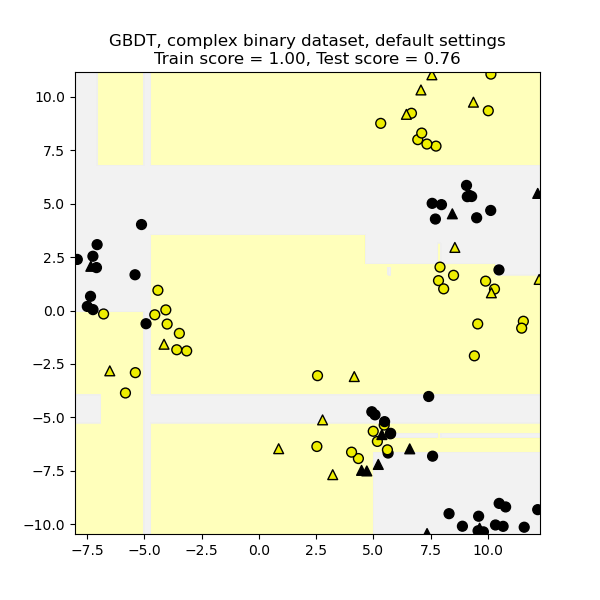

### `max_features` parametresine göre GDBT modelinin Fruits veri setine uygulanması 

In [31]:
#Veri setinin incelenmesi
print(X_fruits.head(3))
print("\n", y_fruits.head(3))

   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60

 0    1
1    1
2    1
Name: fruit_label, dtype: int64


In [32]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits)

#GDBT modelinin max_features parametresine göre oluşturulması
from sklearn.ensemble import GradientBoostingClassifier
for i in range(1, len(X_fruits.columns)+1):
    gdbt = GradientBoostingClassifier(max_features=i).fit(X_train, y_train)
    train = gdbt.score(X_train, y_train)
    test = gdbt.score(X_test, y_test)
    print(f"max_features = {i} iken Train setindeki doğruluk: {train} | Test setindeki doğruluk: {test}")

max_features = 1 iken Train setindeki doğruluk: 1.0 | Test setindeki doğruluk: 0.7333333333333333
max_features = 2 iken Train setindeki doğruluk: 1.0 | Test setindeki doğruluk: 1.0
max_features = 3 iken Train setindeki doğruluk: 1.0 | Test setindeki doğruluk: 1.0
max_features = 4 iken Train setindeki doğruluk: 1.0 | Test setindeki doğruluk: 1.0


### Breast Cancer veri setine GDBT modelinin `max_depth` parametresine göre uygulanması

`max_depth` parametresi, modeldeki her bir ağacın maksimum derinliğini ayarlayar.

In [33]:
#Veri setinin incelenmesi
print(X_cancer[:3])
print("\n", y_cancer[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]

 [0 0 0]


In [34]:
#Train ve Test setlerinin bölünmesi 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

#GDBT modelinin oluşturulması ve eğitilmesi (max_depth = 3)
from sklearn.ensemble import GradientBoostingClassifier
gdbt_3 = GradientBoostingClassifier(max_depth = 3).fit(X_train, y_train)

#Train ve Test setlerindeki skor
print(f"max_depth = 3 iken Train setindeki skor: {gdbt_3.score(X_train, y_train)}")
print(f"max_depth = 3 iken Test setindeki skor: {gdbt_3.score(X_test, y_test)}")


#GDBT modelinin oluşturulması ve eğitilmesi (max_depth = 2)
from sklearn.ensemble import GradientBoostingClassifier
gdbt_2 = GradientBoostingClassifier(max_depth = 2).fit(X_train, y_train)

#Train ve Test setlerindeki skor
print(f"max_depth = 2 iken Train setindeki skor: {gdbt_2.score(X_train, y_train)}")
print(f"max_depth = 2 iken Test setindeki skor: {gdbt_2.score(X_test, y_test)}")

max_depth = 3 iken Train setindeki skor: 1.0
max_depth = 3 iken Test setindeki skor: 0.965034965034965
max_depth = 2 iken Train setindeki skor: 1.0
max_depth = 2 iken Test setindeki skor: 0.972027972027972


## Neural Networks 

Neural Networks (Nöral Ağlar), insan beyninin çalışma prensiplerinden esinlenerek tasarlanmış, verileri işlemek, desenleri tanıman ve karmaşık ilişkileri öğrenmek için kullanılan bir makine öğrenimi ve derin öğrenme tekniğidir. 

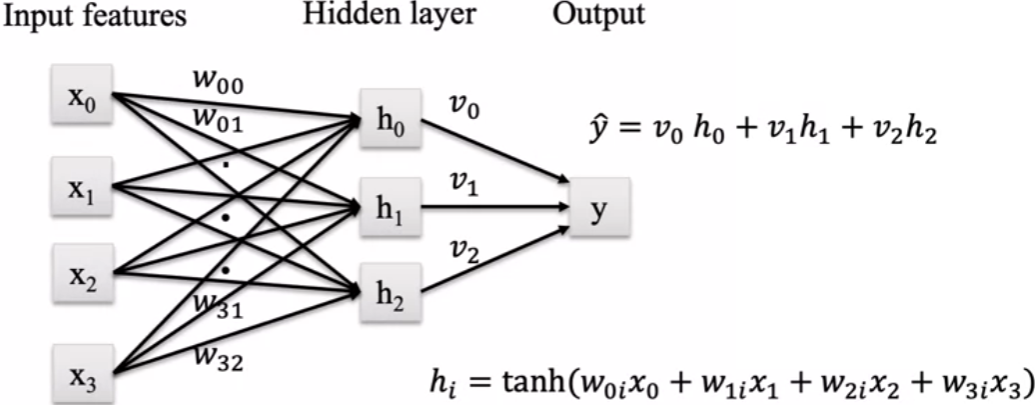

Yukarıdaki görselde olduğu gibi insan beyninin sinir hücrelerine benzer bir yapıdadır. Aslında bu yüzden de `Sinir Ağları` ismini alır. Yapay sinir ağları; `input (giriş)`, `hidden (gizli)` ve `output (çıkış)` adında katmanlardan oluşur. 

**`Input (Giriş):`** Verilerin alındığı katmandır. Veriler bu katmanda alınır.

**`Hidden (Gizli):`** Verilerin işlendiği katmanlardır. Bütün işlem aslında burada gerçekleşir. Alınan veri gizli katmanlardaki her bir nöronda, makine öğrenmesi modellerinde işlenir (Bu modellerin parametreleri birbirinden farklı olabilir). Her nöron bir çıktı üretir ve üretilen çıktı, `aktivasyon fonksiyonlarında` belirli bir dönüşüme uğradıktan sonra, bir sonraki gizli katmana aktarılır. Her gizli katmanda, bir önceki katmandan gelen veri işlenir ve bir sonraki gizli katmana aktarılmak üzere hazırlanır. Son gizli katmanın çıktıları ise çıkış katmanına aktarılır.

**`Output (Çıkış):`** İşlenen veriler son bir işlemden daha geçtikten sonra sonucun elde edildiği katmandır. Çıkış katmanında işlenen veri, gizli katmanlardaki işlemlere benzer bir mantıkla işlenir. Bu işlem sonucunda elde edilen sonuçlar, istenilen çıkış formatına dönüştürülür.

**`Activation Funcitons (Aktivasyon Fonksiyonları):`** Her nöronun çıktısına dönüşüm uygulayarak elde edilen çıktıyı istenilen formata dönüştürür. Nöronun girişlerinden çıktı üretmek için kullanılır ve ağın non-lineer ilişkileri öğrenmesine olanak tanır. 

+ **Sigmoid Fonksiyonu:** Herhangi bir gerçek sayı değerini 0 ile 1 arasında bir değere dönüştürür. Bu, nöronun çıktısını olasılık değerine dönüştürmek için sıklıkla kullanılır. Ancak Sigmoid fonksiyonu, derin nöral ağlarda kullanıldığında, gradiyanın kaybolması (vanishing gradient) sorununa neden olabilir. Formülü:

    $\sigma(z) = \frac{1}{1 + e^\text{-z}}$ şeklindedir. 

+ **ReLU (Rectified Linear Activation = Düzeltilmiş Doğrusal Aktivasyon):** Negatif girişleri 0'a dönüştüren ve pozitif girişleri olduğu gibi bırakan bir aktivasyon yöntemidir. Bu; modelin öğrenme hızını artırır, eğitimi hızlandırır ve gradiyanın kaybolma sorununu azaltır. Formülü:

    $f(z) = max(0, z)$ şeklindedir.

+ **Tanh Fonksiyonu (Hyperbolic Tangent = Hiperbolik Tanjant):** Sigmoid fonksiyonuna benzer, ancak -1 ile 1 arasında değerler üretir. Tanh fonksiyonu genellikle bir nöronun çıktısını normalize etmek için kullanılır. Formülü:

    $tanh(z) = \frac{e^z - e^\text{-z}}{e^z + e^\text{-z}}$ şeklindedir.

+ **Softmax Fonksiyonu:** Genellikle çoklu sınıflandırma problemlerinde, `Output (Çıkış)` katmanında kullanılan bir aktivasyon fonksiyonudur. Softmax fonksiyonu, bir dizi değeri (genellikle çıktıları) alır ve bunları olasılık dağılımına dönüştürür. Her bir değer, 0 ile 1 arasında bir olasılık değeri olarak yeniden ölçeklenir ve toplam olasılıkların 1'e eşit olduğu bir dizi elde edilir. Formülü:

    $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$ şeklindedir.

### Complex Binary Classification problemi için oluşturulan veri setinde, çeşitli katman sayılarına (`hidden_layer_sizes`) göre Neural Networks modellerinin uygulanması

`hiden_layer_sizes` parametresi, modelde ne kadar gizli katman olacağını ve bu katmanlarda ne kadar nöron bulunacağını belirler. Default değeri (100,)'dür.

In [35]:
#Verinin incelenmesi
print(X_D2[:5])
print("\n", y_D2[:5])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]

 [1 0 0 0 0]


In [36]:
#Train ve Test setlerinin bölünmesi 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#Neural Network modelinin oluşturulması ve eğitilmesi 
from sklearn.neural_network import MLPClassifier
for this_layer in [1, 10, 100]:
    nnclf = MLPClassifier(hidden_layer_sizes= this_layer, solver= "lbfgs",
                         random_state = 0).fit(X_train, y_train)
    train = nnclf.score(X_train, y_train)
    test = nnclf.score(X_test, y_test)
    print(f"Gizli katman sayısı {this_layer} iken Train setindeki skor: {train} | Test setindeki skor: {test}")

Gizli katman sayısı 1 iken Train setindeki skor: 0.6133333333333333 | Test setindeki skor: 0.64
Gizli katman sayısı 10 iken Train setindeki skor: 0.7733333333333333 | Test setindeki skor: 0.64
Gizli katman sayısı 100 iken Train setindeki skor: 0.9333333333333333 | Test setindeki skor: 0.68


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+ `solver = lbfgs` parametresi, gradyan algoritmasını belirler. Hangi optimizasyon türünün kullanılacağı seçilir.
+ Her bir modelde 1 adet gizli katman ve her gizli katmanda sırayla 1, 10 ve 100 nöron vardır.

In [37]:
print(nnclf.predict([[0.23, 0.32434]]))
print(nnclf.predict([[0.948, 0.942]]))

[0]
[0]


+ Modellerin grafikleri:

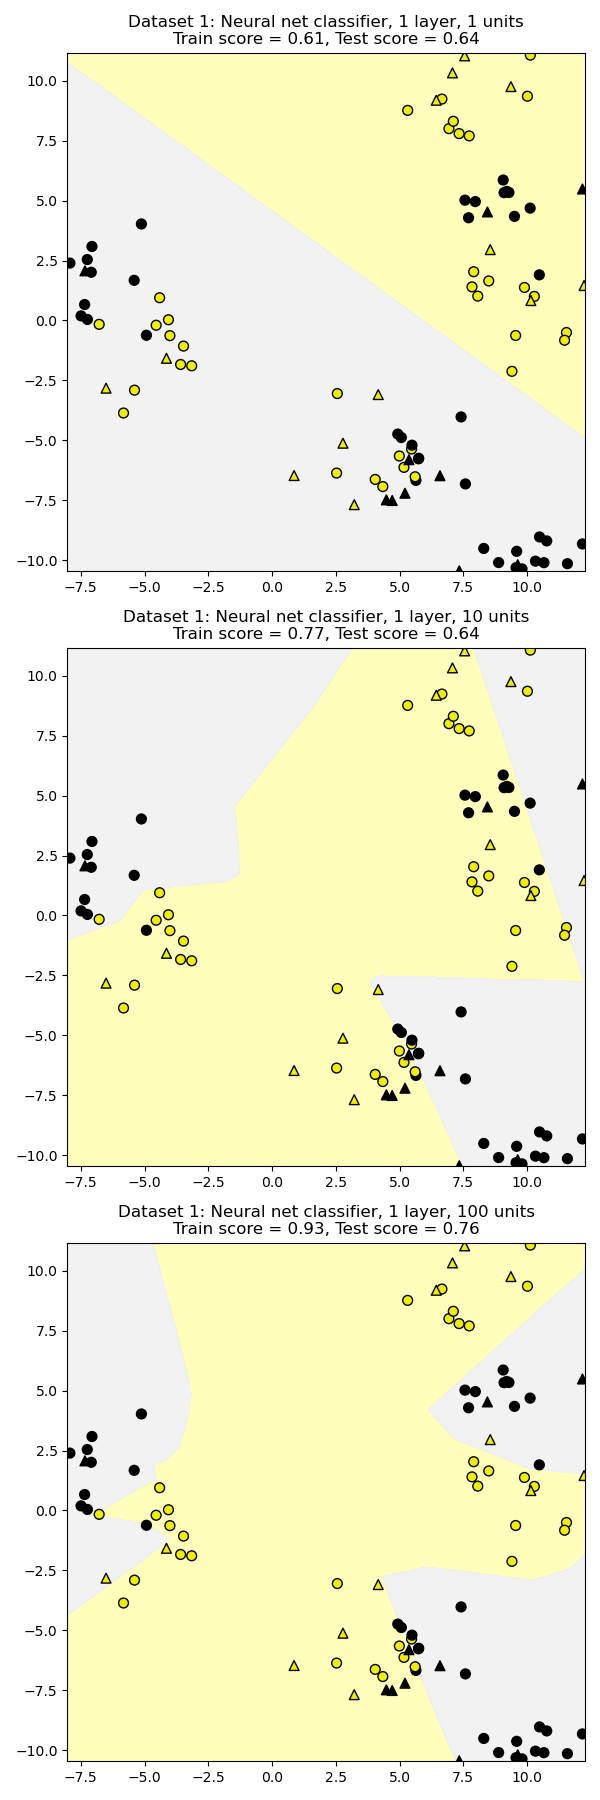

### 2 Gizli katman olan durum

In [38]:
#Verinin incelenmesi
print(X_D2[:5])
print("\n", y_D2[:5])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]

 [1 0 0 0 0]


In [39]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#Neural Network modelinin oluşturulması ve eğitilmesi 
from sklearn.neural_network import MLPClassifier
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver ="lbfgs", random_state = 0).fit(X_train, y_train)
train = nnclf.score(X_train, y_train)
test = nnclf.score(X_test, y_test)
print(f"Gizli katman sayısı {this_layer} iken Train setindeki skor: {train} | Test setindeki skor: {test}")

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Gizli katman sayısı 100 iken Train setindeki skor: 0.9733333333333334 | Test setindeki skor: 0.68


### Complex Binary Classification problemi için oluşturulan veri setinde, çeşitli aktivasyon türlerine göre (`activation`) Neural Networks modellerinin uygulanması

`activation` parametresi, katmanlarda hangi aktivasyon fonksiyonunun kullanılacığını belirler. Default değeri, `relu`'dur.

In [40]:
#Verinin incelenmesi
print(X_D2[:5])
print("\n", y_D2[:5])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]

 [1 0 0 0 0]


In [41]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#Neural Network modelinin oluşturulması ve eğitilmesi 
for this_activation in ["tanh", "relu", "identity", "logistic"]:
    nnclf = MLPClassifier(hidden_layer_sizes = [100, 100], solver = "lbfgs",
                         activation = "tanh", ).fit(X_train, y_train)
    train = nnclf.score(X_train, y_train)
    test = nnclf.score(X_test, y_test)
    print(f"Aktivasyon fonksiyonu {this_activation} iken Train setindeki skor: {train} | Test setindeki skor: {test}")

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Aktivasyon fonksiyonu tanh iken Train setindeki skor: 1.0 | Test setindeki skor: 0.84


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Aktivasyon fonksiyonu relu iken Train setindeki skor: 1.0 | Test setindeki skor: 0.8


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Aktivasyon fonksiyonu identity iken Train setindeki skor: 0.9733333333333334 | Test setindeki skor: 0.8
Aktivasyon fonksiyonu logistic iken Train setindeki skor: 1.0 | Test setindeki skor: 0.72


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+ `this_layer_sizes = [100, 100]` parametresi, 2 adet gizli katmanın olduğu ve her gizli katmanda 100 adet nöronun bulunduğu anlamına gelir. Yani toplamda 200 nöron vardır.

### Complex Binary Classification problemi için oluşturulan veri setinde, çeşitli `alpha` değerlerine sahip Neural Networks modellerinin uygulanması

Scikit-Learn'ün `MLPClassifier` işlevi ile oluşturulan Neural Network modellerine `L2 Regülarizasyonu uygulanır.` Bu işlevdeki `alpha` parametresi, bu regülarizasyonun miktarını belirler. Default değeri 0.0001'dir.

In [42]:
#Verinin incelenmesi
print(X_D2[:5])
print("\n", y_D2[:5])

[[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]

 [1 0 0 0 0]


In [43]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

#Neural Network modelinin oluşturulması ve eğitilmesi 
for this_alpha in [0.01, 0.1, 1.0, 5.0]:
    nnclf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = this_alpha, solver = "lbfgs",
                         activation = "tanh", ).fit(X_train, y_train)
    train = nnclf.score(X_train, y_train)
    test = nnclf.score(X_test, y_test)
    print(f"Alpha değeri {this_alpha} iken Train setindeki skor: {train} | Test setindeki skor: {test}")

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha değeri 0.01 iken Train setindeki skor: 0.9866666666666667 | Test setindeki skor: 0.76


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha değeri 0.1 iken Train setindeki skor: 0.9733333333333334 | Test setindeki skor: 0.72


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha değeri 1.0 iken Train setindeki skor: 0.9066666666666666 | Test setindeki skor: 0.8
Alpha değeri 5.0 iken Train setindeki skor: 0.8666666666666667 | Test setindeki skor: 0.92


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+ Modellerin grafikleri:

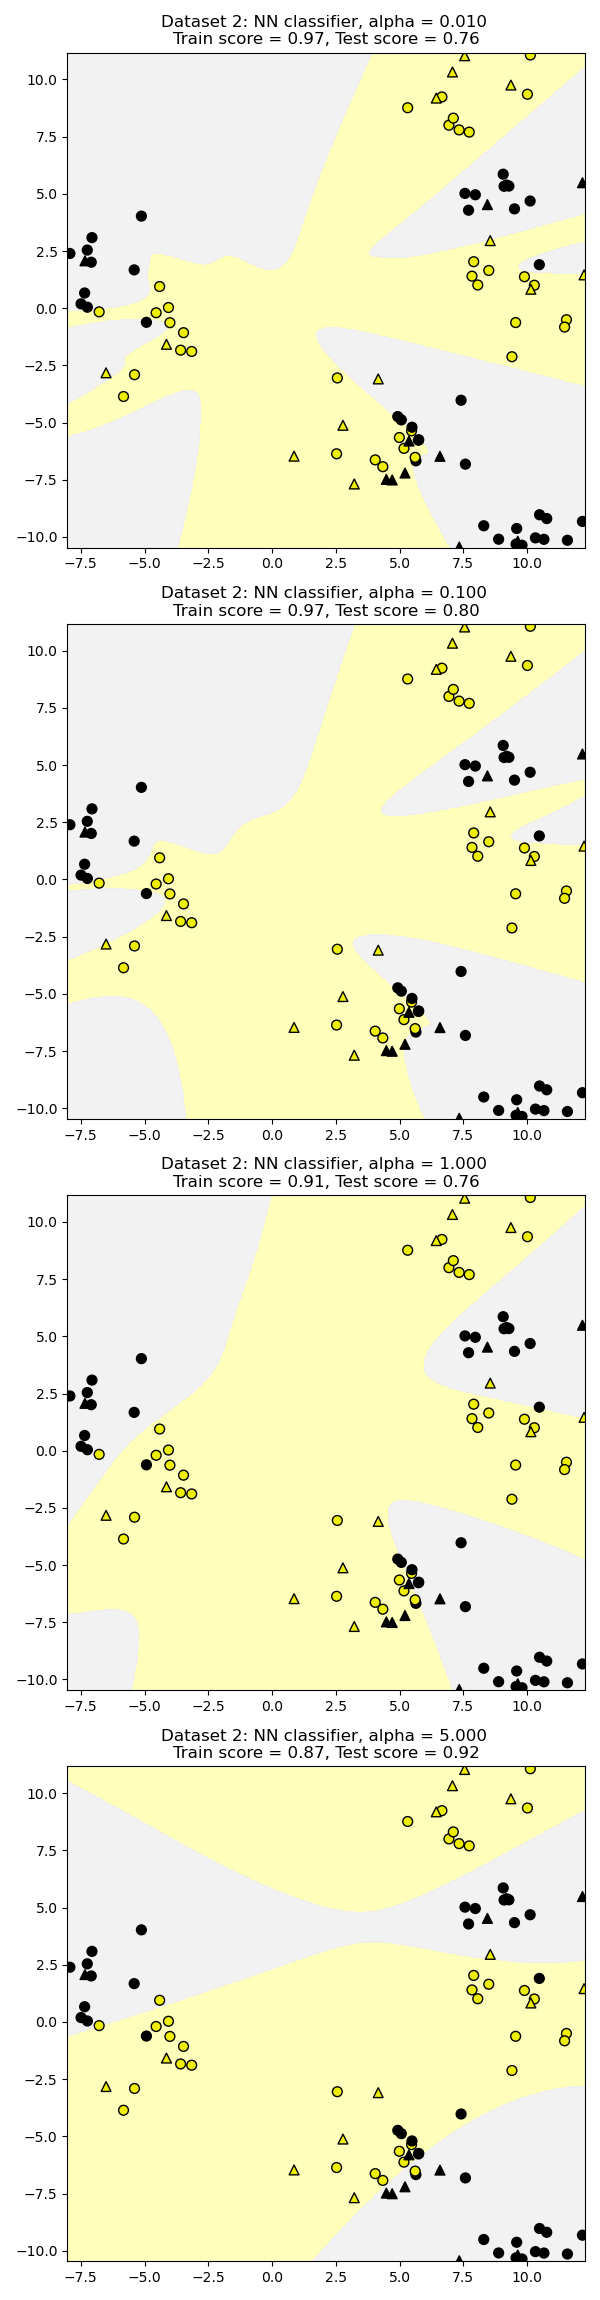

### Simple Regression problemi için oluşuturulan veri setine Neural Network modelinin uygulanması

In [44]:
#Veri setinin incelenmesi
print(X_R1[:5])
print("\n", y_R1[:5])

[[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]]

 [120.61202772 131.22864089 150.56377656 169.90502386 118.15657878]


In [45]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

#Neural Network modelinin oluşturulması ve eğitilmesi (alpha parametresinin değerlerine göre)
from sklearn.neural_network import MLPRegressor
for this_alpha in [0.0001, 1.0, 100]:
    nnreg = MLPRegressor(hidden_layer_sizes = [100, 100], alpha = this_alpha, solver = "lbfgs").fit(X_train, y_train)
    train = nnreg.score(X_train, y_train)
    test = nnreg.score(X_test, y_test)
    print(f"Alpha = {this_alpha} | Train skoru = {train} | Test skoru = {test}")

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha = 0.0001 | Train skoru = 0.72557422102503 | Test skoru = 0.4419515260117629


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Alpha = 1.0 | Train skoru = 0.7562080920576638 | Test skoru = 0.4001195101618419
Alpha = 100 | Train skoru = 0.6916278706655125 | Test skoru = 0.4796421355221345


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [46]:
#Neural Network modelinin oluşturulması ve eğitilmesi (activation parametresinin değerlerine göre)
from sklearn.neural_network import MLPRegressor
for this_activation in ["relu", "tanh", "logistic"]:
    nnreg = MLPRegressor(hidden_layer_sizes = [100, 100], activation = this_activation ,solver = "lbfgs").fit(X_train, y_train)
    train = nnreg.score(X_train, y_train)
    test = nnreg.score(X_test, y_test)
    print(f"Activation = {this_activation} | Train skoru = {train} | Test skoru = {test}")

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation = relu | Train skoru = 0.730439072910263 | Test skoru = 0.4500131669182066


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation = tanh | Train skoru = 0.8010264212584395 | Test skoru = 0.46139817502229685
Activation = logistic | Train skoru = 0.8506922090147004 | Test skoru = 0.30322780132644445


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Breast Cancer veri seti üzerinde Neural Network modelinin uygulanması

In [47]:
#Veri setinin incelenmesi
print(X_cancer[:3])
print("\n", y_cancer[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]

 [0 0 0]


In [48]:
#Train ve Test setlerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

#Train ve Test setlerindeki input değerlerinin MinMaxScaler ile ölçeklendirilmesi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Neural Network modelinin kurulması ve eğitilmesi
from sklearn.neural_network import MLPClassifier
nnclf = MLPClassifier(hidden_layer_sizes = [100, 100], solver = "lbfgs", alpha = 0.5).fit(X_train_scaled, y_train)

print("Breast Cancer Dataset \n", 
      f"Train setindeki skor = {nnclf.score(X_train_scaled, y_train)} \n Test setindeki skor = {nnclf.score(X_test_scaled, y_test)}")

Breast Cancer Dataset 
 Train setindeki skor = 0.9906103286384976 
 Test setindeki skor = 0.951048951048951
